# View pickles star SED

- author Sylvie Dagoret-Campagne
- creation date : 2024/08/01
- update : 2024/09/02
- last update : 2024/09/02

In [1]:
# Import some generally useful packages

import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
import pandas as pd
from astropy.io import fits

In [2]:
plt.rcParams["figure.figsize"] = (8,6)
plt.rcParams["axes.labelsize"] = 'x-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'x-large'
plt.rcParams['ytick.labelsize']= 'x-large'

In [3]:
# Import the primary photometry classes from rubin_sim.photUtils
from rubinsimphot.phot_utils import Bandpass, Sed
from rubinsimphot.data.data_sets import  get_data_dir

## Config

### Find where are the data

In [4]:
# Find the throughputs directory 
#fdir = os.getenv('RUBIN_SIM_DATA_DIR')
fdir = get_data_dir()
if fdir is None:  #environment variable not set
    fdir = os.path.join(os.getenv('HOME'), 'rubin_sim_data')


#### definition of path

In [5]:
fauxteldir = os.path.join(fdir, 'throughputs', 'auxtel')
flsstdir = os.path.join(fdir, 'throughputs', 'baseline')
seddir = os.path.join(fdir, 'pysynphot', 'pickles')

In [6]:
#!ls $flsstdir

In [7]:
#!ls $fauxteldir

#### Read the throughput curves

In [8]:
filterlist = ['u', 'g', 'r', 'i', 'z', 'y']
filtercolors = {'u':'b', 'g':'c', 'r':'g', 'i':'orange', 'z':'r', 'y':'m'}

In [9]:
lsst = {}
for f in filterlist:
    lsst[f] = Bandpass()
    lsst[f].read_throughput(os.path.join(flsstdir, f'hardware_{f}.dat'))

In [10]:
auxtel = {}
for f in filterlist:
    auxtel[f] = Bandpass()
    auxtel[f].read_throughput(os.path.join(fauxteldir, f'auxtel_sdss_{f}p_total.dat'))

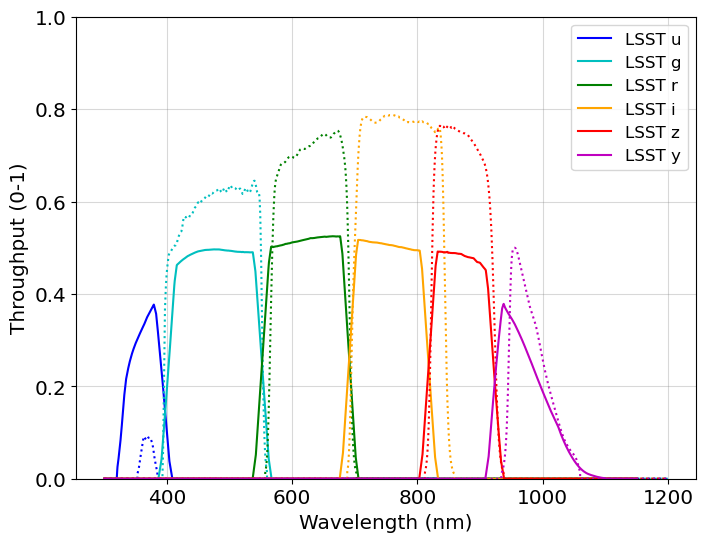

In [11]:
# Plot the curves .. see what we have. 
filtercolors = {'u':'b', 'g':'c', 'r':'g', 'i':'orange', 'z':'r', 'y':'m'}

plt.figure(figsize=(8,6))
for f in filterlist:
    plt.plot(lsst[f].wavelen, lsst[f].sb, color=filtercolors[f], label=f"LSST {f}")
    plt.plot(auxtel[f].wavelen, auxtel[f].sb,':' ,color=filtercolors[f])
plt.xlabel("Wavelength (nm)", fontsize='x-large')
plt.ylabel("Throughput (0-1)", fontsize='x-large')
plt.ylim(0, 1)
plt.grid(True, alpha=0.3, color='gray')
plt.legend(loc='upper right', fancybox=True, fontsize='large')

## SED

In [12]:
! ls $seddir

AA_README dat_uvi   dat_uvk


In [13]:
seddir_uvi = os.path.join(seddir,"dat_uvi")
seddir_uvk = os.path.join(seddir,"dat_uvk")

In [14]:
all_pickles_uvi = sorted(os.listdir(seddir_uvi))
all_pickles_uvk = sorted(os.listdir(seddir_uvk))

# all_pickles_uvi

In [15]:
file_ref = os.path.join(seddir_uvi, "pickles.fits")

In [16]:
hdul = fits.open(file_ref)

In [17]:
#hdul.info()
#hdul[0].header

In [18]:
df = pd.DataFrame(hdul[1].data)

In [19]:
df.head()

,FILENAME,SPTYPE
0,pickles_1,O5V
1,pickles_2,O9V
2,pickles_3,B0V
3,pickles_4,B1V
4,pickles_5,B3V


In [20]:
NSED = len(df)

In [21]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = mpl.colors.Normalize(vmin=0, vmax=NSED)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NSED), alpha=1)

/var/folders/79/hrybm_4s0zjd4jsb7lp_trhh0000gp/T/ipykernel_99936/4084661958.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_xticklabels(labels,rotation=45);
/Users/dagoret/anaconda3/envs/conda_py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


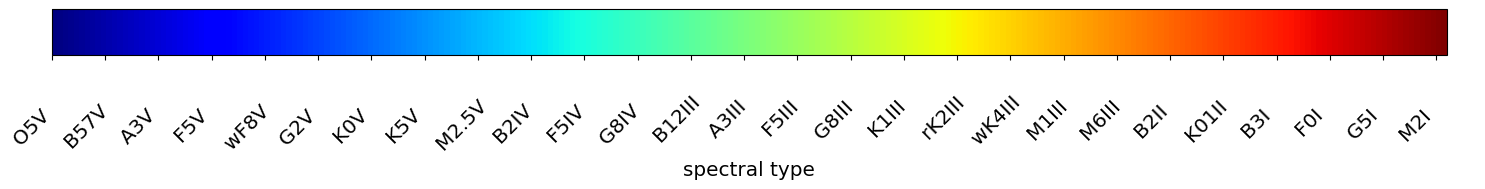

In [22]:
fig, ax = plt.subplots(figsize=(18, 0.6), layout='constrained')
cmap = mpl.cm.jet
norm = mpl.colors.Normalize(vmin=0, vmax=NSED)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),cax=ax, orientation='horizontal', label='spectral type')

# change the number of labels
labels = [item.get_text() for item in cbar.ax.get_xticklabels()]
cbar.ax.locator_params(axis='x', nbins=4*len(labels)) 
labels = [item.get_text() for item in cbar.ax.get_xticklabels()]

# rename the labels
Nlabels = len(labels)
for ilab in range(0,Nlabels-1):
    the_label = int(labels[ilab])
    labels[ilab] = df.loc[the_label,"SPTYPE"]
cbar.ax.set_xticklabels(labels,rotation=45);
plt.show()

/var/folders/79/hrybm_4s0zjd4jsb7lp_trhh0000gp/T/ipykernel_99936/3386735218.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(labels,rotation=0);


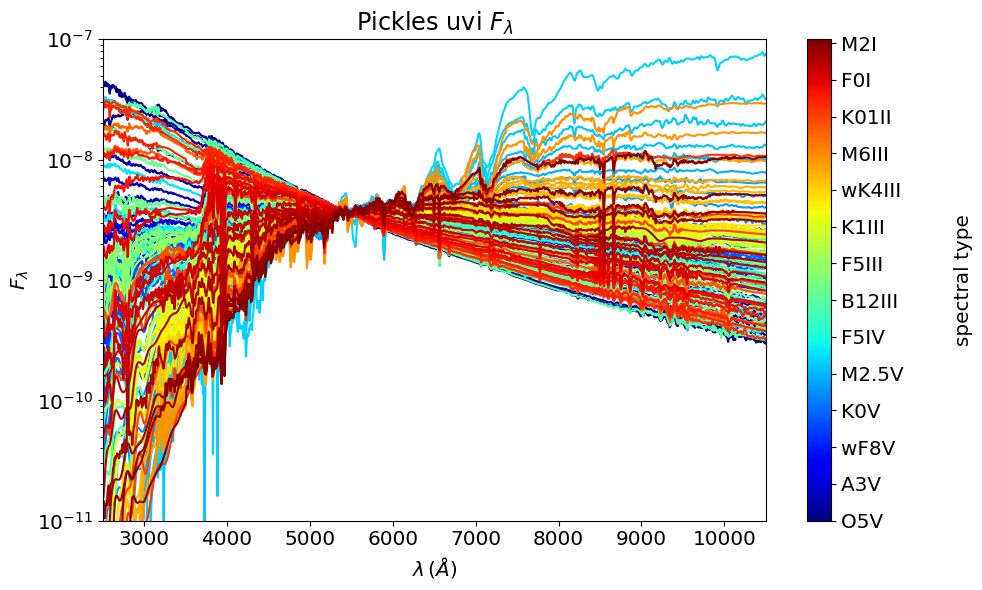

In [23]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
for index in np.arange(NSED):
    filename = df.loc[index,"FILENAME"].strip()+".fits"
    fullfilename = os.path.join(seddir_uvi,filename) 
    hdul = fits.open(fullfilename)
    dff = pd.DataFrame(hdul[1].data)
    if index not in np.arange(100,105):
        ax.plot(dff.WAVELENGTH,dff.FLUX,color=all_colors[index])

    #wl = dff.WAVELENGTH.values 
    #fl = dff.FLUX.values

    #idx_sel = np.where(wl>4500)[0]
    #wl = wl[idx_sel]
    #fl = fl[idx_sel]
    #flmin = fl.min()
    #if flmin < 1e-10:
    #    print(index,filename,flmin,"Skipped")


ax.set_yscale('log')
ax.set_xlim(2500.,10500)
ax.set_ylim(1e-11,1e-7)   
ax.set_title("Pickles uvi $F_\lambda$")
ax.set_ylabel("$F_\lambda$")
ax.set_xlabel("$\lambda \, (\AA$)")

cbar =fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),ax=ax, orientation='vertical', label='spectral type')

labels = [item.get_text() for item in cbar.ax.get_yticklabels()]
cbar.ax.locator_params(axis='y', nbins=2*len(labels)) 
labels = [item.get_text() for item in cbar.ax.get_yticklabels()]

Nlabels = len(labels)
for ilab in range(0,Nlabels-1):
    the_label = int(labels[ilab])
    labels[ilab] = df.loc[the_label,"SPTYPE"]
cbar.ax.set_yticklabels(labels,rotation=0);
plt.tight_layout()    

# all_pickles_uvk

In [24]:
file_ref = os.path.join(seddir_uvk, "pickles_uk.fits")

In [25]:
hdul = fits.open(file_ref)

In [26]:
df = pd.DataFrame(hdul[1].data)

In [27]:
df

,FILENAME,SPTYPE
0,pickles_uk_1,O5V
1,pickles_uk_2,O9V
2,pickles_uk_3,B0V
3,pickles_uk_4,B1V
4,pickles_uk_5,B3V
...,...,...
126,pickles_uk_127,G8I
127,pickles_uk_128,K2I
128,pickles_uk_129,K3I
129,pickles_uk_130,K4I


In [28]:
NSED = len(df)

In [29]:
# wavelength bin colors
jet = plt.get_cmap('jet')
cNorm = mpl.colors.Normalize(vmin=0, vmax=NSED)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(NSED), alpha=1)

/var/folders/79/hrybm_4s0zjd4jsb7lp_trhh0000gp/T/ipykernel_99936/4084661958.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_xticklabels(labels,rotation=45);
/Users/dagoret/anaconda3/envs/conda_py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


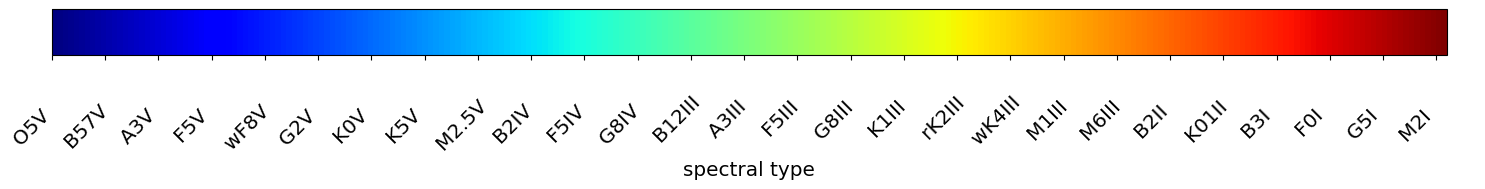

In [30]:
fig, ax = plt.subplots(figsize=(18, 0.6), layout='constrained')
cmap = mpl.cm.jet
norm = mpl.colors.Normalize(vmin=0, vmax=NSED)
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),cax=ax, orientation='horizontal', label='spectral type')

# change the number of labels
labels = [item.get_text() for item in cbar.ax.get_xticklabels()]
cbar.ax.locator_params(axis='x', nbins=4*len(labels)) 
labels = [item.get_text() for item in cbar.ax.get_xticklabels()]

# rename the labels
Nlabels = len(labels)
for ilab in range(0,Nlabels-1):
    the_label = int(labels[ilab])
    labels[ilab] = df.loc[the_label,"SPTYPE"]
cbar.ax.set_xticklabels(labels,rotation=45);
plt.show()

/var/folders/79/hrybm_4s0zjd4jsb7lp_trhh0000gp/T/ipykernel_99936/2513668053.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(labels,rotation=0);


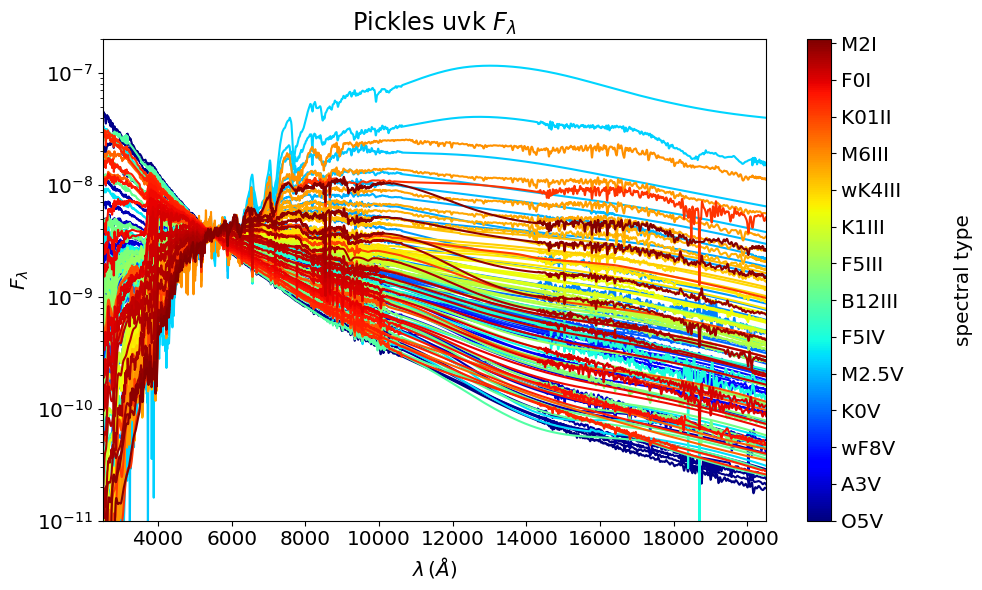

In [31]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
for index in np.arange(NSED):
    filename = df.loc[index,"FILENAME"].strip()+".fits"
    fullfilename = os.path.join(seddir_uvk,filename) 
    hdul = fits.open(fullfilename)
    dff = pd.DataFrame(hdul[1].data)
    if index not in np.arange(100,105):
        ax.plot(dff.WAVELENGTH,dff.FLUX,color=all_colors[index])
ax.set_yscale('log')
ax.set_xlim(2500.,20500)
ax.set_ylim(1e-11,2e-7)   
ax.set_title("Pickles uvk $F_\lambda$")
ax.set_ylabel("$F_\lambda$")
ax.set_xlabel("$\lambda \, (\AA$)")

cbar =fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),ax=ax, orientation='vertical', label='spectral type')

labels = [item.get_text() for item in cbar.ax.get_yticklabels()]
cbar.ax.locator_params(axis='y', nbins=2*len(labels)) 
labels = [item.get_text() for item in cbar.ax.get_yticklabels()]

Nlabels = len(labels)
for ilab in range(0,Nlabels-1):
    the_label = int(labels[ilab])
    labels[ilab] = df.loc[the_label,"SPTYPE"]
cbar.ax.set_yticklabels(labels,rotation=0);
plt.tight_layout()